# Data Analysis and Vizualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
complete_data = 'completed.csv'
fuel_cons = 'fuelcons.csv'
icao_iata = 'icao-iata.csv'

# Aanalisys of the data collected from OpenSky

# Graph of fuel economy of 6 aircraft

In [3]:
def fuel_cons_graph():
    df = pd.read_csv(fuel_cons)
    
    # Replace 'd' symbols with empty string
    new_column_names = {}
    for column_name in df.columns:
        new_column_name = column_name.replace('d', '')
        new_column_names[column_name] = new_column_name
    df = df.rename(columns=new_column_names)
    df.rename(columns={'Coe': 'code'}, inplace=True)

    # Leave only the needed rows
    df = df[df['code'].isin(['319', '320', '321', '31N', '32N', '32Q'])]
    df.set_index('code', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    # Choose the first 8 columns and plot
    df = df.iloc[:, :8]
    # Choose the style
    colors = {'319': 'salmon', '320': 'mediumseagreen', '321': 'cornflowerblue', '31N': 'salmon', '32N': 'mediumseagreen', '32Q': 'cornflowerblue'}
    linestyles = {'319': '-', '320': '-', '321': '-', '31N': '--', '32N': '--', '32Q': '--'}

    # Fix the legend
    legend_labels = {'319': 'A319', '320': 'A320', '321': 'A321', '31N': 'A319neo', '32N': 'A320neo', '32Q': 'A321neo'}
    legend_order = ['319', '31N', '320', '32N', '321', '32Q']
    
    plt.figure(figsize=(10, 7))  # Adjust figure size as needed

    for code in legend_order:
        sns.lineplot(data=df.loc[code], label=legend_labels[code], color=colors[code], linestyle=linestyles[code])

    ax = plt.gca()

    # Remove the right and upper borders
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Labeling and styling the plot
    plt.xlabel('Distance (km)', fontstyle='italic')
    plt.ylabel('Fuel Consumption (kg)', fontstyle='italic')
    plt.title('Comparison of Fuel Consumption of Newer and Older Airbus Models', fontstyle='italic')
    plt.legend(title = 'Model')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    percentage_decrease(df, '321', '32Q')
    percentage_decrease(df, '320', '32N')
    percentage_decrease(df, '319', '31N')

In [4]:
def percentage_decrease(df, model1, model2):
    # Select rows corresponding to the given models
    model1_data = df.loc[model1]
    model2_data = df.loc[model2]

    # Calculate the percentage decrease for each distance
    percentage_decrease = ((model1_data - model2_data) / model1_data) * 100
    avg_percentage_decrease = percentage_decrease.mean()

    print("Average percentage decrease in fuel consumption between '{}' and '{}': {:.2f}%".format(model1, model2, avg_percentage_decrease))

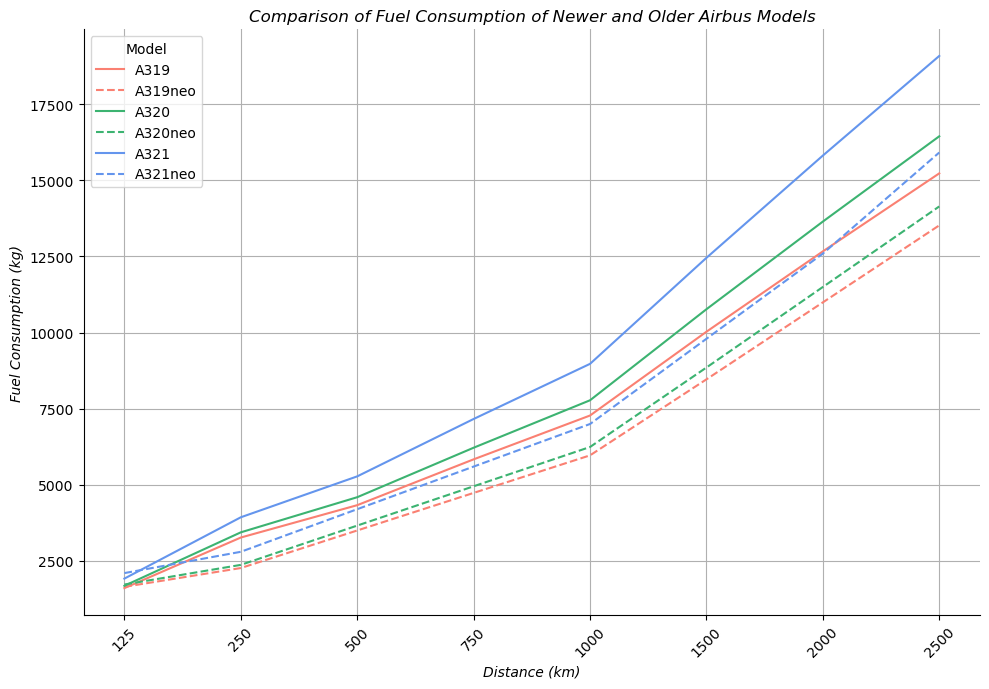

Average percentage decrease in fuel consumption between '321' and '32Q': 17.78%
Average percentage decrease in fuel consumption between '320' and '32N': 17.10%
Average percentage decrease in fuel consumption between '319' and '31N': 15.55%


In [5]:
fuel_cons_graph()

# Fuel consumption of aircarft per km

In [6]:
def most_fuel_cons_aircraft():

    df = pd.read_csv(complete_data)
    df_fuel = pd.read_csv(fuel_cons)

    top_10_models = df['model'].value_counts().nlargest(11).index

    if len(top_10_models) >= 3:
        top_10_models = top_10_models[:-2].tolist() + top_10_models[-1:].tolist()    #print(top_10_models)

    typenums = ['320', '738', '319', 'E90', '321', '32N', 'E95', 'CR9', '7M8', 'ATR']
    mapped_vals = list(zip(top_10_models, typenums))
    mapped_df = pd.DataFrame(mapped_vals, columns=['model', 'typenum'])

    new_column_names = {}
    for column_name in df_fuel.columns:
        new_column_name = column_name.replace('d', '')
        new_column_names[column_name] = new_column_name
    df_fuel = df_fuel.rename(columns=new_column_names)
    df_fuel.rename(columns={'Coe': 'code'}, inplace=True)

    #print(df_fuel)

    df_fuel = df_fuel[df_fuel['code'].isin(typenums)]
    df_fuel.set_index('code', inplace=True)
    df_fuel = df_fuel.apply(pd.to_numeric, errors='coerce')

    mapped_df = pd.merge(mapped_df, df_fuel, left_on='typenum', right_on='code')
    
    mapped_df = mapped_df.loc[:,  ['typenum', 'model', '1000', '1500', '2000']]

    mapped_df.loc[7, '2000'] = mapped_df.loc[7, '1500'] + (mapped_df.loc[7, '1500'] - mapped_df.loc[7, '1000'])

    mapped_df['co2/1000km'] = mapped_df['1000'] * 3.16 / 1000
    mapped_df['co2/1500km'] = mapped_df['1500'] * 3.16 / 1500
    mapped_df['co2/2000km'] = mapped_df['2000'] * 3.16 / 2000

    ordered_df = mapped_df.sort_values(by='1000')
    
    #print(ordered_df)

    ordered_df['typenum'] = ordered_df['typenum'].astype(str)
    ordered_df.set_index('model', inplace=True)

    #print
    num_rows = len(ordered_df)

    # Create a sequence of numeric values for spacing between the bars
    index_values = range(num_rows)
    
    columns = ['co2/1000km', 'co2/1500km', 'co2/2000km']

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    
    plt.bar(index_values, ordered_df[columns[0]], color='salmon', width=0.25, label=columns[0], alpha = 0.7)
    plt.bar([idx + 0.25 for idx in index_values], ordered_df[columns[1]], color='mediumseagreen', width=0.25, label=columns[1], alpha = 0.7)
    plt.bar([idx + 0.5 for idx in index_values], ordered_df[columns[2]], color='cornflowerblue', width=0.25, label=columns[2], alpha = 0.7)

    ax = plt.gca()

    # Remove the right and upper borders
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add labels and title
    plt.xlabel('')
    plt.ylabel('Killograms Co2 per kilometer')
    plt.title('Co2 Emissions per kilometer for a defined range of The 10 Most Used Aircraft', fontstyle='italic')
    plt.xticks([idx + 0.05 for idx in index_values], ordered_df.index)  # Use index values for ticks
    plt.xticks(rotation=75)
    plt.legend()

    # Show the plot ######TODO: FORMAT THE CHART
    plt.show()

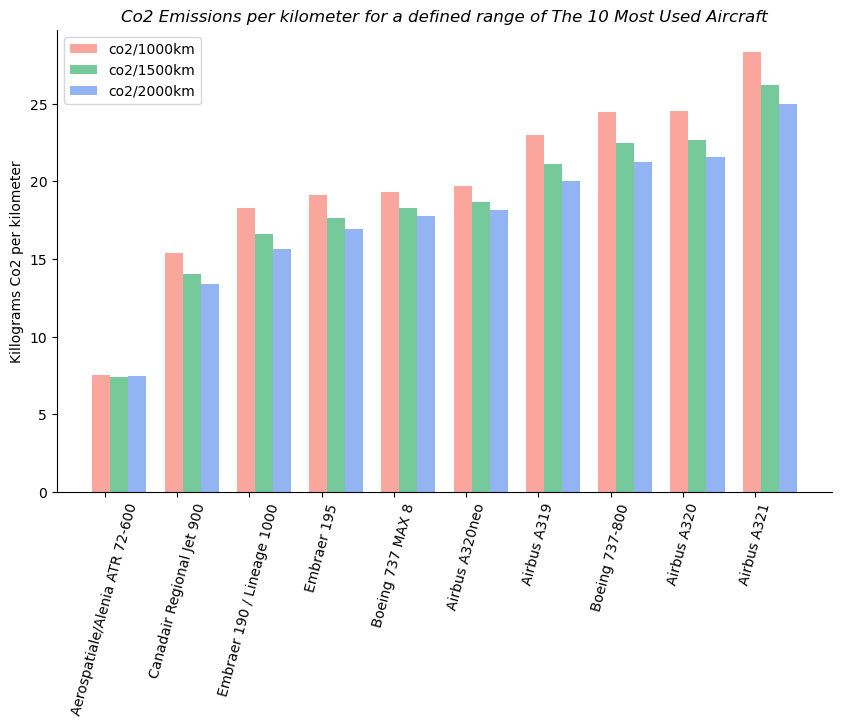

In [7]:
most_fuel_cons_aircraft()

# Carbon Emissions vs Flight Distance Scatterplot

In [8]:
def distance_emissions_scatt():
    df = pd.read_csv(complete_data)

    #Remove noise
    df = df[df['co2'] <= 100000]
    df = df[~((df['distance(km)'] < 500) & (df['co2'] > 60000))]

    long_df = df[df['distance(km)'] > 1500]

    df = pd.concat([df, long_df, long_df, long_df], ignore_index = False)
    df = df.reset_index()

    count_over_1500 = df[df['distance(km)'] > 1500].shape[0]
    total_count = df.shape[0]
    percentage_over_1500 = (count_over_1500 / total_count) * 100

    print(percentage_over_1500)

    print(len(df))

    mask = df['distance(km)'] > 1500
    df = pd.concat([df, df[mask], df[mask]], ignore_index=True)
    df['distance_category'] = df['distance(km)'].apply(lambda x: 'Non-Short Distance' if x > 1500 else 'Short Distance')

    custom_palette = {"Short Distance": "cornflowerblue", "Non-Short Distance": "salmon"}

    jplt = sns.jointplot(x = df['distance(km)'], y = df['co2'], hue = df['distance_category'], palette=custom_palette)
    jplt.fig.set_size_inches(10, 6)
    jplt.set_axis_labels('Dinstance (km)', 'Co2 (kg)', fontsize = 9)

    plt.suptitle('Scatterplot of Distance vs. Co2 of Short Distance and Non-Short Distance Flights', fontsize=12, fontstyle='italic')

    legend = plt.legend()
    legend.set_title("Flight Type")
    
    # Adjust the title position (optional)
    plt.subplots_adjust(top=0.95)
    
    #print(df)

20.893970893970895
3848


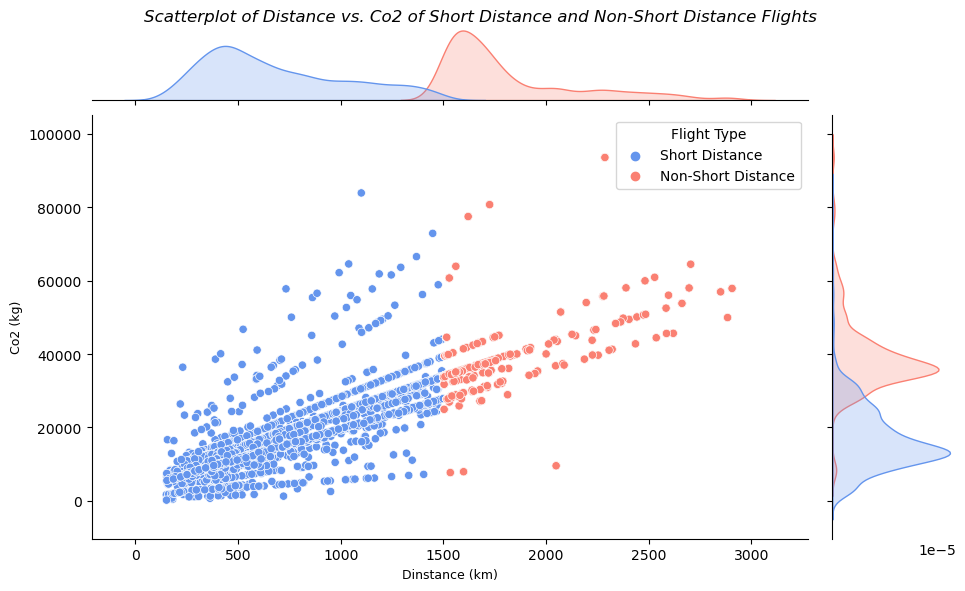

In [9]:
distance_emissions_scatt()

# Fuel and Carbon Data

In [10]:
def tot_fuel():
    df = pd.read_csv(complete_data)

    long_df = df[df['distance(km)'] > 1500]

    comp_df = pd.concat([df, long_df, long_df, long_df], ignore_index = False)
    comp_df = comp_df.reset_index()
    
    count_over_1500 = comp_df[comp_df['distance(km)'] > 1500].shape[0]
    total_count = comp_df.shape[0]
    percentage_over_1500 = (count_over_1500 / total_count) * 100

    print(percentage_over_1500)

    tot_fuel = comp_df['fuel'].sum() * 7
    tot_co2 = tot_fuel * 3.16
    print('Fuel for asll recorded flights:')
    print(tot_fuel)
    print('Co2 for asll recorded flights:')
    print(tot_co2)
    
    print('Data for short-distance flights:')
    long_df = comp_df[comp_df['distance(km)'] > 1500]
    short_df = comp_df[comp_df['distance(km)'] < 1500]

    tot_fuel_shrt = short_df['fuel'].sum() * 7
    tot_co2_shrt = tot_fuel_shrt * 3.16
    print('Fuel for short-distnce flights:')
    print(tot_fuel_shrt)
    print('Co2 for short-distance flights:')
    print(tot_co2_shrt)
    
    print('Data for non-short-distance flights:')
    tot_fuel_lng = long_df['fuel'].sum() * 7
    tot_co2_lng = tot_fuel_lng * 3.16
    print('Fuel for non-short-distance flights:')
    print(tot_fuel_lng)
    print('Co2 for non-short-distance flights:')
    print(tot_co2_lng)

    print('Co2 per km:')
    tot_dist = comp_df['distance(km)'].sum()
    tot_co2 = comp_df['co2'].sum()
    co2_km = tot_co2 / tot_dist
    print(co2_km)

In [11]:
tot_fuel()

20.883116883116884
Fuel for asll recorded flights:
184015950.93
Co2 for asll recorded flights:
581490404.9388001
Data for short-distance flights:
Fuel for short-distnce flights:
114761860.00999999
Co2 for short-distance flights:
362647477.63159996
Data for non-short-distance flights:
Fuel for non-short-distance flights:
69254090.91999999
Co2 for non-short-distance flights:
218842927.30719995
Co2 per km:
23.469835649105086
